In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [2]:
# Read the csv file into a pandas DataFrame

foam = pd.read_csv('../Resources/foam.csv')
foam.head()

,time,foam,beer
0,0,17.4,0.60
1,15,15.1,2.20
2,30,13.1,3.40
3,45,11.6,4.15
4,60,10.6,4.50


In [3]:
# Assign the data to X and y

X = foam[["foam", "beer"]]
y = foam["time"].values.reshape(-1, 1)
print(X.shape, y.shape)

(13, 2) (13, 1)


In [4]:
from sklearn.datasets import make_regression

n_features = 2
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 2)


In [5]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)


c:\Users\youpe.DESKTOP-UVNLIE6\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


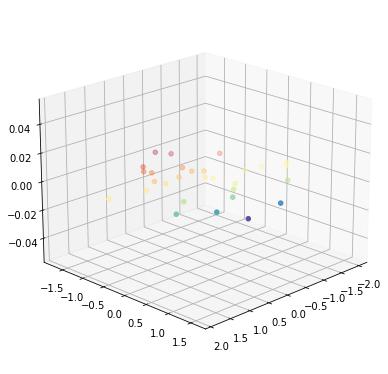

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [16]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)

model.fit(X_test, y_test)
testing_score = model.score(X_test, y_test)


In [14]:
# Fit the model to the training data and calculate the scores for the training and testing data

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9996474839108033
Testing Score: 0.9999195913854164


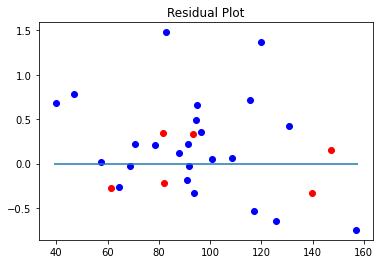

In [18]:
# Plot the Residuals for the Training and Testing data

predictions = model.predict(X)
# Plot Residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, 
        c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, 
        c="red", label="Testing Data")
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()